## Project extensions

The following is a proposed idea for an extension.

The file `car-stopping-distances.csv` contains data on stopping distances (in meters) for cars traveling at various speeds (in kilometers per hour).

Would a linear or quadratic model provide a better fit for this dataset?

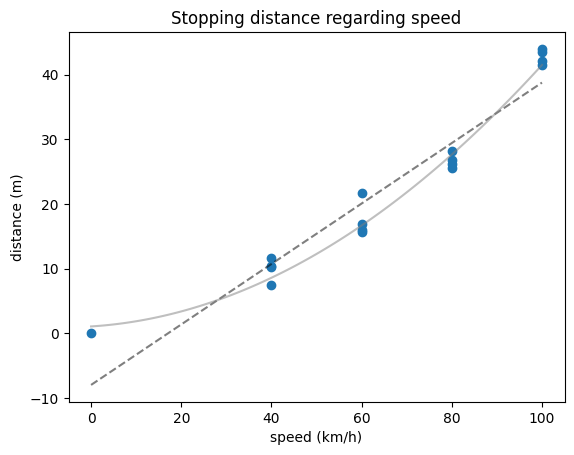

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

cars = pd.read_csv('car-stopping-distances.csv')

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)
    def predict(self, x):
        return self.slope * x + self.intercept
    def plot_model(self, xmin, xmax):
        ymin = self.predict(xmin)
        ymax = self.predict(xmax)
        plt.plot([xmin, xmax], [ymin, ymax], color='black', alpha=0.5, linestyle='--')
    def print_model_info(self):
        rsquared = self.rsquared
        print(f'The goodness of the model : {rsquared:.3f}')

class QuadraticModel:
    def __init__(self, model_name=''):
        self.model_name = model_name
    def fit(self, x, y):
        x = pd.DataFrame(x)
        quadratic = PolynomialFeatures(degree=2)
        quad_features = quadratic.fit_transform(x)
        quad_model = LinearRegression().fit(quad_features, y)
        y_pred = quad_model.predict(quad_features)
        self.a = quad_model.coef_[2]
        self.b = quad_model.coef_[1]
        self.c = quad_model.intercept_
        self.rsquared = r2_score(y, y_pred)
    def predict(self, x):
        return self.a*x**2 + self.b*x + self.c
    def plot_model(self, xmin, xmax):
        xvals = range(xmin, xmax + 1)
        yvals = [self.predict(x) for x in xvals]
        plt.plot(xvals, yvals, color='grey', alpha=0.5)
    def print_model_info(self):
        rsquared = self.rsquared
        print(f'The goodness of model : {rsquared:.3f}')

# Plot
plt.scatter(cars['speed'], cars['dist'])
plt.title('Stopping distance regarding speed')
plt.xlabel('speed (km/h)')
plt.ylabel('distance (m)')

# Test the Linear Model
linear_test = LinearModel('linear_test')
linear_test.fit(cars['speed'], cars['dist'])
# Set the linear line
cars['dist'] = cars['dist'].astype(int)
xmin_speed = cars['speed'].min()
xmax_speed = cars['speed'].max()
linear_test.plot_model(xmin_speed, xmax_speed)

# Test the quadratic model
quad_test = QuadraticModel('quad_test')
quad_test.fit(cars['speed'], cars['dist'])
quad_test.plot_model(xmin_speed, xmax_speed)

In [13]:
# Answer to the question
print('Linear model :')
linear_test.print_model_info()
print('================\nLinear model :')
quad_test.print_model_info()

Linear model :
The goodness of the model : 0.925
Linear model :
The goodness of model : 0.981
